In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import copy

# Data Preprocess

In [2]:
train_df = pd.read_csv("data/sign_mnist_train.csv")
test_df = pd.read_csv("data/sign_mnist_test.csv")

In [3]:
test = copy.deepcopy(test_df)
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [5]:
test.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

# Data Visualization

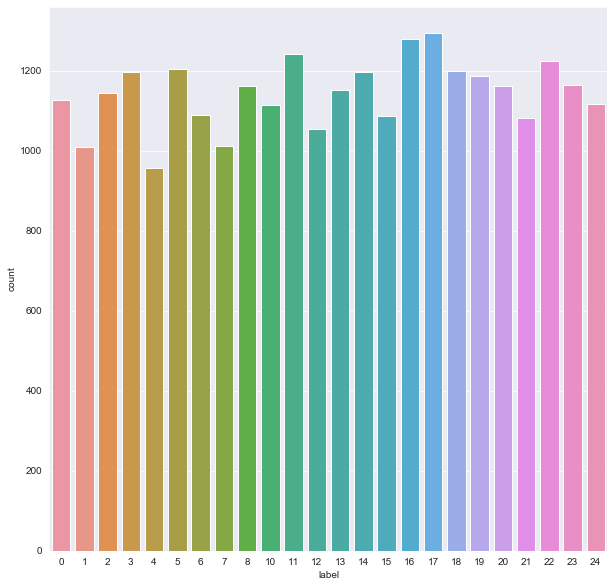

In [6]:
plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(train_df['label'])

# Models

## Dataset standardization

In [7]:
from sklearn.preprocessing import StandardScaler

# Strategies
accuracy_ls = {}
f1_score_ls = {}
model_ls = {}
y_pred_ls = {}

X_train = train_df.drop(columns = 'label')
y_train = train_df['label']
X_test = test_df.drop(columns = 'label')
y_test = test_df['label']

# Standardize data
#preprocessing data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [8]:
# Normalize the data
# x_train = x_train / 255
# x_test = x_test / 255

# # Reshaping the data from 1-D to 3-D as required through input by CNN's
# x_train = x_train.reshape(-1,28,28,1)
# x_test = x_test.reshape(-1,28,28,1)

## Models with K-fold Cross Vlidation

In [9]:
# Importing the required modelling libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
# 1. Naïve Bayesian
nb = GaussianNB()
# 2. Decision tree classifier (any variation will do) k-NN
dtc = DecisionTreeClassifier()
# 3. k-NN
knn = KNeighborsClassifier(n_neighbors=3)
# 4. Random Forest
# might need to tune parameters
rfc = RandomForestClassifier(n_estimators = 200)
# 5. Logistic regression
logistic = LogisticRegression(C = 0.5, max_iter = 1000)
# 6. AdaBoost
adaboost = AdaBoostClassifier(n_estimators=100, random_state=0)
# 7. SVM (Support Vector Machine)
svc = SVC(kernel = 'rbf', max_iter = 1000, probability = True)

# Training the model 1 Naive Baysian
ml_model = {
    'Naive Bayesian': nb, 
    'Decision Tree Classifier': dtc, 
    'KNeighbors Classifier': knn,
    'Random Forest Classifier': rfc, 
    'Logistic Regression': logistic, 
    'AdaBoost Classifier': adaboost, 
    'SVC': svc
}

total_model = len(ml_model)

for i, (name, clf) in enumerate(ml_model.items()):  
    print('Training model {}/{} {}...'.format((i+1), total_model, name))
    #cross validation k fold
    classifier = clf
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    y_pred_ls[name] = y_pred
    accuracy_ls[name] = accuracy
    f1_score_ls[name] = f1
    model_ls[name] = model
    print(str(clf))
    print ("The accuracy of model {} : {:.3f}".format(name, accuracy))
    print ("The f1 score of model {} : {:.3f}".format(name, f1))
    print('==============================================================================')

Training model 1/7 Naive Bayesian...
GaussianNB(priors=None, var_smoothing=1e-09)
The accuracy of model Naive Bayesian : 0.390
The f1 score of model Naive Bayesian : 0.369
Training model 2/7 Decision Tree Classifier...
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The accuracy of model Decision Tree Classifier : 0.436
The f1 score of model Decision Tree Classifier : 0.425
Training model 3/7 KNeighbors Classifier...
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
The accuracy 

/Users/allen/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=1000, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The accuracy of model SVC : 0.849
The f1 score of model SVC : 0.831


# Result Analysis

## Comparison for Accuracy and F1-Score

In [10]:
# Comparison
results = {
    'ML Models': [name for name in model_ls.keys()],
    'Accuracy': [a for a in accuracy_ls.values()],
    'F1-score': [f1 for f1 in f1_score_ls.values()]
}

df_results = pd.DataFrame(data=results)

# df_results.style.highlight_max(color='yellow')
df_results.style.background_gradient(cmap='Blues')

,ML Models,Accuracy,F1-score
0,Naive Bayesian,0.389849,0.369259
1,Decision Tree Classifier,0.435583,0.424928
2,KNeighbors Classifier,0.812605,0.802507
3,Random Forest Classifier,0.827384,0.811505
4,Logistic Regression,0.700223,0.677133
5,AdaBoost Classifier,0.286252,0.273538
6,SVC,0.848578,0.831495


## ROC Curve

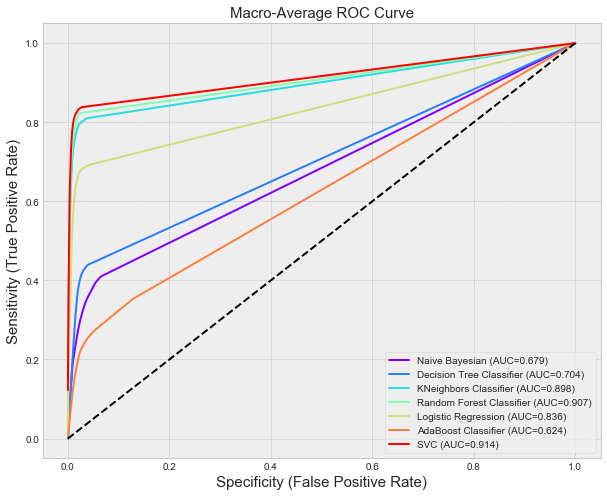

In [11]:
# ROC Curve for the classification models
from collections import Counter
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from numpy import interp

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")
color = cm.rainbow(np.linspace(0, 1, len(model_ls)))
plt.title("Macro-Average ROC Curve", fontsize = 15)
plt.xlabel("Specificity (False Positive Rate)", fontsize = 15)
plt.ylabel("Sensitivity (True Positive Rate)", fontsize = 15)
labels = list()
n_classes = len(Counter(y_train))

# Plot ROC Curve
for c, (name, classifier) in enumerate(ml_model.items()):
    
    y_pred = y_pred_ls[name]

    ### MACRO
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(y_pred))[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])


    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    plt.plot(fpr["macro"], tpr["macro"], color=color[c])
    labels.append('{} (AUC={:.3f})'.format(name, roc_auc['macro']))
  
plt.gca().legend(labels, loc='lower right', frameon=True)    
plt.plot([0,1],[0,1], linestyle='--', color='black')
plt.show()